In [6]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, avg_abundance, total_stellar_mass, gasmetals_profile

redshift = 3

In [7]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]

In [8]:
# axes limits
M_lim = [10.5, 12]
logRe_lim = [-0.52, 1.94]
MRe_lim = [9.36, 11.89]
FeHRe_lim = [-0.39, 0.53]
FeH1kpc_lim = [-0.23, 0.53]
MgFeRe_lim = [0.21, 0.53]
MgFe1kpc_lim = [0.16, 0.55]
MgHRe_lim = [-0.03, 0.77]
MgH1kpc_lim = [0.16, 0.54]
age_lim = [0, 2.5]
ageabundance_lim = [-1.8, 0.9]
bigage_lim = [0, 13]


In [9]:
import warnings
warnings.filterwarnings('ignore')

# z=2 parameters
# 1.2 -> 0.8 Gyr
# 1.5 -> 1.0 Gyr
# -10.5 -> -9.5
PSB_selection = (median_age<=0.8)&(np.log10(newbin_current_SFR/10**(total_mass))<=-9.5)
intermediate_quiescent_selection = (median_age>0.8)&(median_age<=1.0)&(np.log10(newbin_current_SFR/10**(total_mass))<=-9.5)
old_quiescent_selection = (median_age>1.0)&(np.log10(newbin_current_SFR/10**(total_mass))<=-9.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-9.5)

# [Fe/H]

median, unweighted

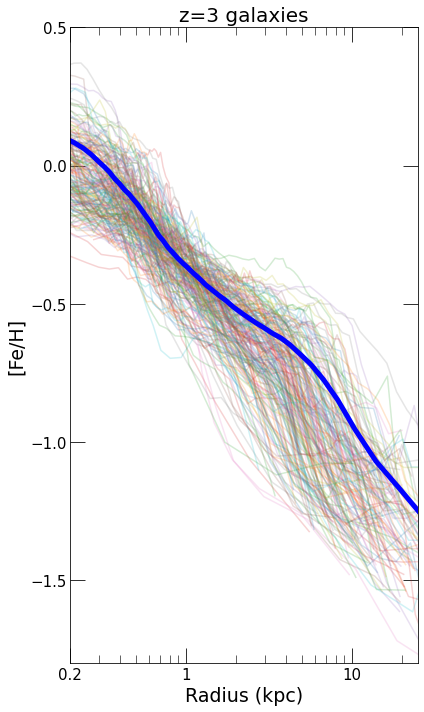

In [13]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50

#z=2 star-forming galaxies
distance = np.zeros(0)
big_metallicity = np.zeros(0)
for id in np.random.choice(ids, 200, replace=False):
    yy, logFeH, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_metallicity = np.concatenate((big_metallicity, logFeH), axis = None)
    ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    distance = np.concatenate((distance, R), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
ax1.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('z=' + str(redshift) + ' galaxies', fontsize=20) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('[Fe/H]', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

gas abundance

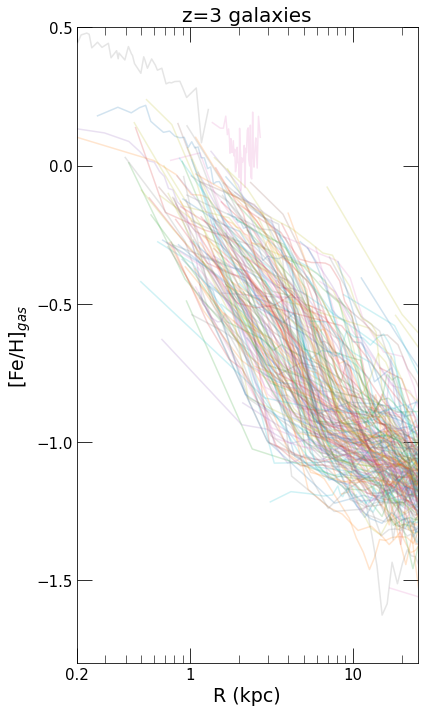

In [12]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50

#z=2 star-forming galaxies
for id in np.random.choice(ids, 200, replace=False):
    yy, logFeH, xx, R = gasmetals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    if len(yy) == 1:
        pass
    else:
        ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
ax1.set_title('z=' + str(redshift) + ' galaxies', fontsize=20) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlabel("R (kpc)", fontsize=19)
ax1.set_ylabel('[Fe/H]$_{gas}$', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])


f.tight_layout()